# Min-Max Normalized PSTH Heatmap Analysis

This notebook creates Min-Max normalized heatmaps that combine PSTH data from multiple units.
- **Y-axis**: Units (can be sorted by firing rate or in ascending order)
- **X-axis**: Time relative to interval start (ms)
- **Color**: Min-Max normalized firing rate (scaled between 0 and 1)

## Min-Max Normalization Formula
**N = (F - Min) / (Max - Min)**
- **N** = normalized value (between 0 and 1)
- **F** = firing rate of an individual bin
- **Min** = minimum firing rate of a unit (considers all bins)
- **Max** = maximum firing rate of a unit (considers all bins)

This normalization scales each unit's firing rates to a 0-1 range, allowing for better comparison across units with different baseline firing rates. Unlike z-score normalization, min-max normalization preserves the original distribution shape and provides intuitive 0-1 bounds.

## Unit Sorting Options
- **Default** (sort_by_firing_rate=False): Units displayed in ascending numerical order
- **Firing Rate Sorted** (sort_by_firing_rate=True): Units sorted by total firing rate (sum of all bins) in descending order - most active units at the top

## Parameters
Configure the analysis parameters in the cell below and run the analysis.

In [9]:
# Import required modules
import sys
import os
sys.path.append('.')

# Force reload of the module to pick up new changes
import importlib
if 'min_max' in sys.modules:
    importlib.reload(sys.modules['min_max'])

import min_max
from min_max import (
    create_multiple_duration_normalized_heatmaps,
    analyze_units_by_max_normalized_value
)
import matplotlib.pyplot as plt

In [10]:
# Configuration Parameters

# Data files (adjust paths as needed)
spikes_file = '../../../Data/040425/spikes.csv'
intervals_file = '../../../Data/040425/pico_time_adjust.csv'
spikes_path = os.path.abspath(spikes_file)
intervals_path = os.path.abspath(intervals_file)

# Analysis parameters
durations_ms = [5, 10, 25]        # Interval durations to analyze (ms)
units = None                      # Units to include (None = all units)
bin_size_ms = 0.1                 # Bin size in milliseconds
pre_interval_ms = 5               # Time before interval start (ms)
post_interval_ms = 100             # Time after interval END (ms)
smooth_window = 10                #  Smoothing window (bins)
sort_by_firing_rate = True       # Sort units by total firing rate (descending)

# Output settings
save_plots = True
output_dir = '../../../Output/040425/min_max_normalized_heatmaps2'


--- Processing normalized heatmap for duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/040425/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45)]
Available interval durations (first 5): ['4.93ms', '5.00ms', '5.07ms', '5.13ms', '5.47ms']
Found

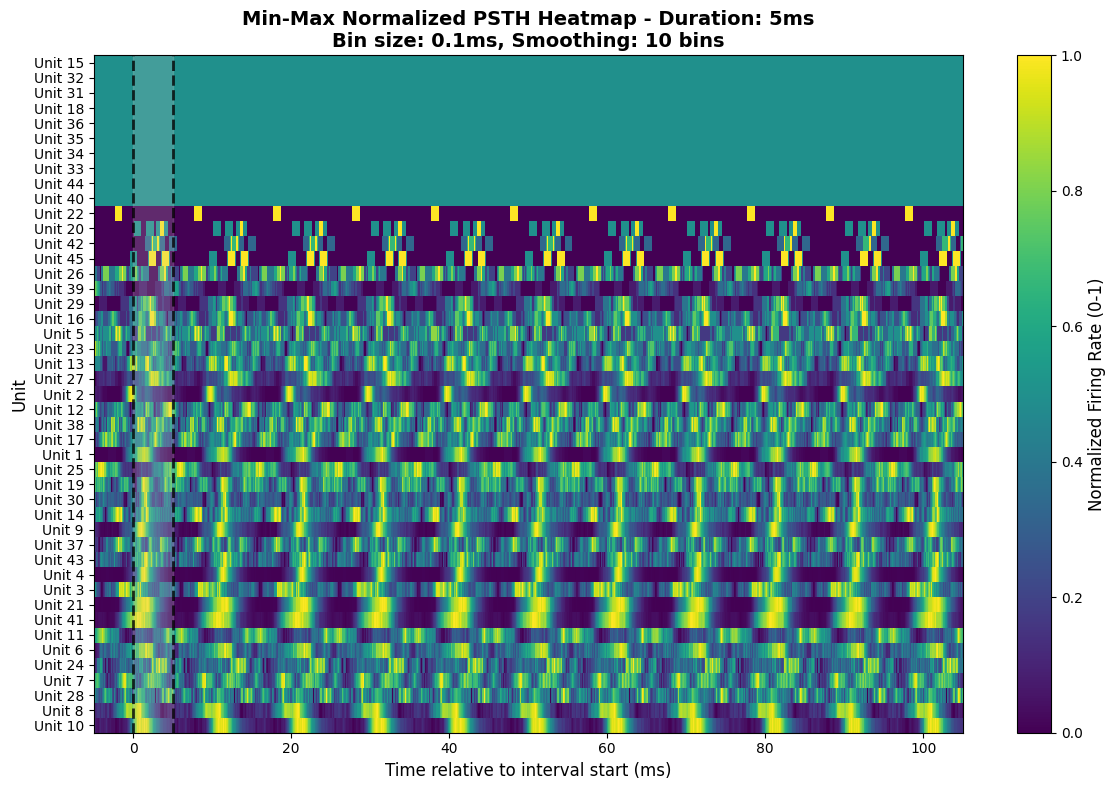

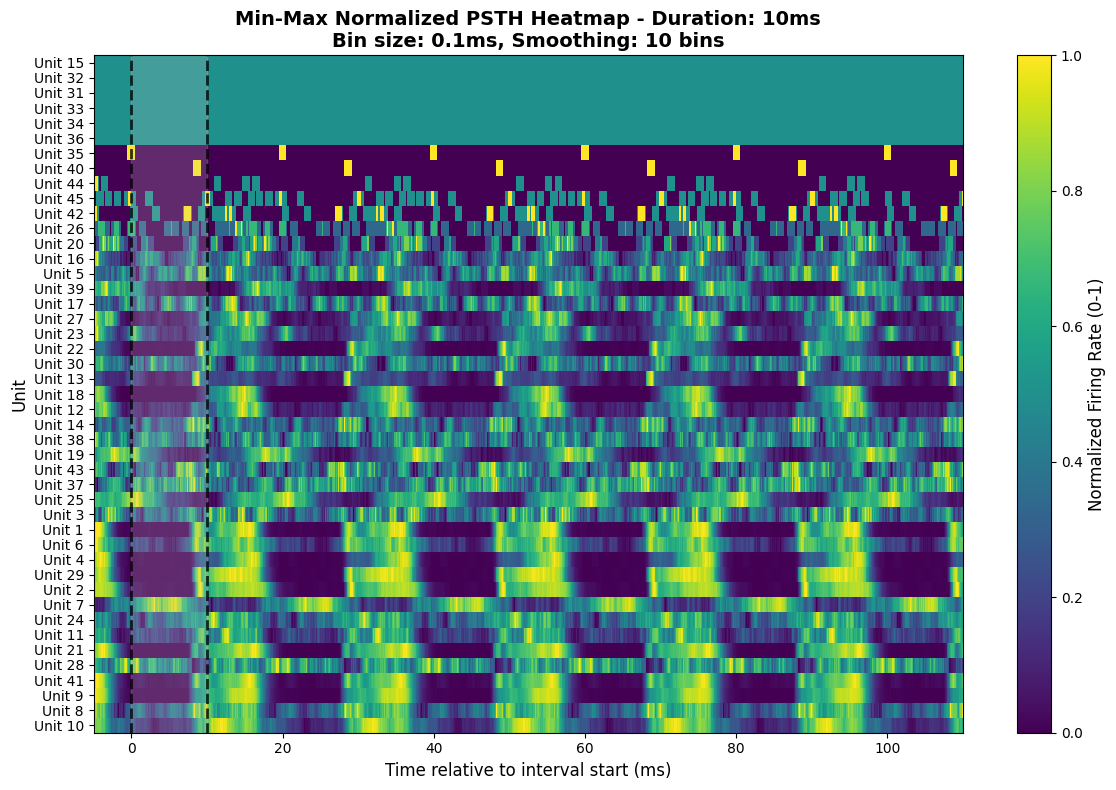

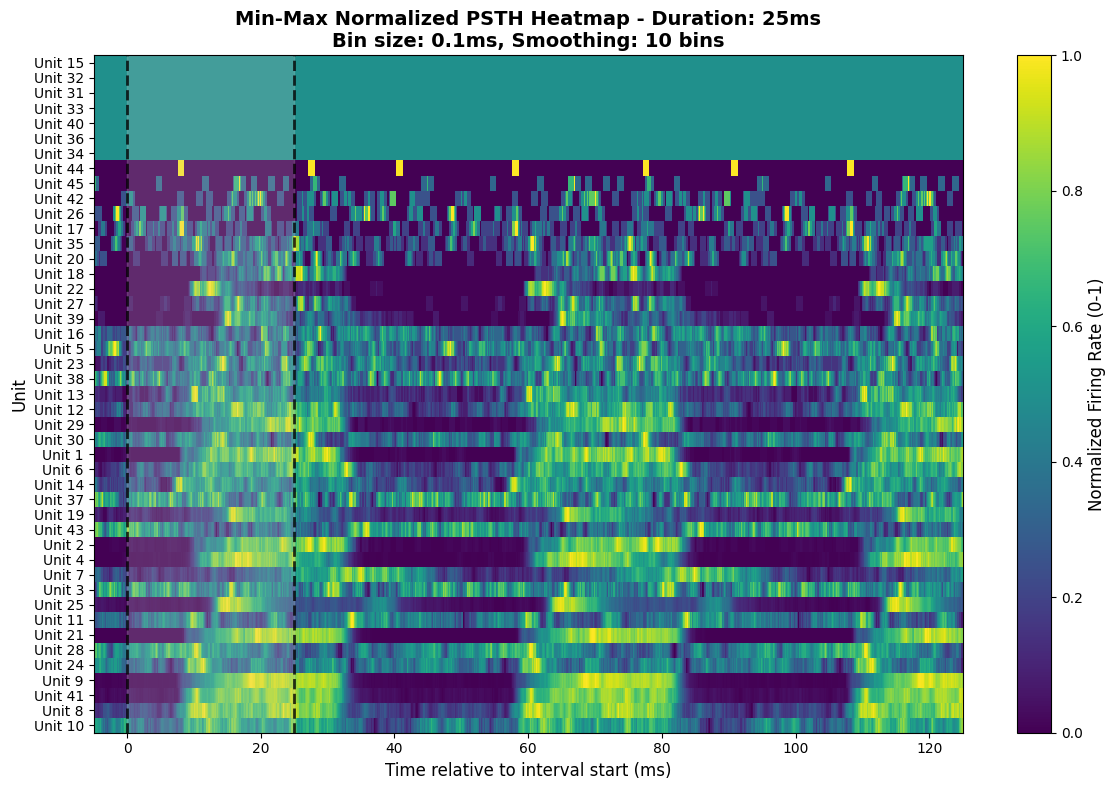

In [11]:
# Create Min-Max Normalized PSTH heatmaps for all specified durations

save_dir = output_dir if save_plots else None

results = create_multiple_duration_normalized_heatmaps(
    spikes_file=spikes_path,
    intervals_file=intervals_path,
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    sort_by_firing_rate=sort_by_firing_rate,
    save_dir=save_dir
)

# Show the plots
plt.show()

In [ ]:
# Analyze units by their mean normalized values (since max is always 1.0 in min-max normalization)
unit_rankings = analyze_units_by_max_normalized_value(results, display_results=True)


=== Duration: 5ms ===
Units ordered by highest maximum z-score (positive direction):
Rank	Unit	Max Z-Score
------------------------------
 1	Unit 22	   2.500
 2	Unit 30	   2.227
 3	Unit 19	   2.218
 4	Unit 14	   2.117
 5	Unit 28	   2.099
 6	Unit 37	   2.062
 7	Unit 45	   2.030
 8	Unit 17	   2.005
 9	Unit 13	   1.951
10	Unit 16	   1.935
11	Unit 43	   1.913
12	Unit 20	   1.875
13	Unit 12	   1.854
14	Unit  7	   1.847
15	Unit 39	   1.797
16	Unit 10	   1.795
17	Unit 21	   1.788
18	Unit 27	   1.778
19	Unit 29	   1.773
20	Unit 38	   1.765
21	Unit 41	   1.738
22	Unit  9	   1.723
23	Unit  3	   1.715
24	Unit 24	   1.715
25	Unit  1	   1.714
26	Unit  4	   1.709
27	Unit 42	   1.705
28	Unit 23	   1.666
29	Unit  6	   1.651
30	Unit 11	   1.640
31	Unit 25	   1.630
32	Unit  5	   1.624
33	Unit 26	   1.599
34	Unit  8	   1.570
35	Unit  2	   1.507
36	Unit 15	   0.000
37	Unit 18	   0.000
38	Unit 31	   0.000
39	Unit 32	   0.000
40	Unit 33	   0.000
41	Unit 34	   0.000
42	Unit 35	   0.000
43	Unit 36	   0.000
4